In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Default goto activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Default goto activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Probability distribution

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #Default goto optimizer
model.fit(x_train,y_train,epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2635 - acc: 0.9238
Epoch 2/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1046 - acc: 0.9681
Epoch 3/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0699 - acc: 0.9773


In [14]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0954 - acc: 0.9717
0.09535575084332376 0.9717


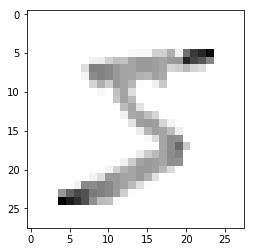

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [15]:
model.save('num_reader.model')

In [16]:
new_model = tf.keras.models.load_model('num_reader.model')

In [18]:
predictions = new_model.predict(x_test)

In [19]:
print(predictions)

[[1.3649823e-10 1.3726300e-07 1.2452592e-06 ... 9.9999690e-01
  2.7089342e-09 1.8266066e-07]
 [4.4440476e-10 1.2685907e-04 9.9987149e-01 ... 6.9197681e-12
  2.3553110e-07 3.3897749e-11]
 [1.0315908e-07 9.9997389e-01 3.6352972e-06 ... 1.3926483e-05
  2.4264568e-06 1.1275080e-06]
 ...
 [1.3748477e-09 7.4382564e-07 1.8408667e-08 ... 3.0369249e-05
  1.2139979e-07 8.7658840e-04]
 [4.6305654e-06 4.3720938e-08 9.3180738e-08 ... 1.5757336e-06
  4.3693039e-05 5.2579203e-09]
 [3.2817400e-08 9.0377600e-10 7.6374196e-09 ... 2.6466518e-12
  2.6415179e-08 9.0816563e-09]]


In [20]:
import numpy as np

print(np.argmax(predictions[0]))

7


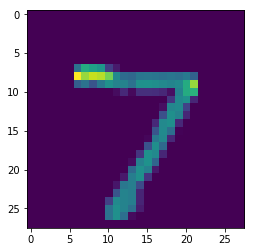

In [21]:
plt.imshow(x_test[0])
plt.show()

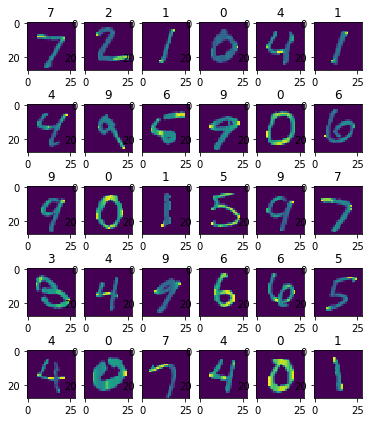

In [36]:
fig,ax=plt.subplots(5,6)
c=0
for j in range(5):
    for i in range(6):
        ax[j,i].imshow(x_test[c])
        ax[j,i].set_title(np.argmax(predictions[c]))
        c+=1
plt.subplots_adjust(top=1.5)